# **⭐ Classification Model to Identify Species of IRIS Flower**

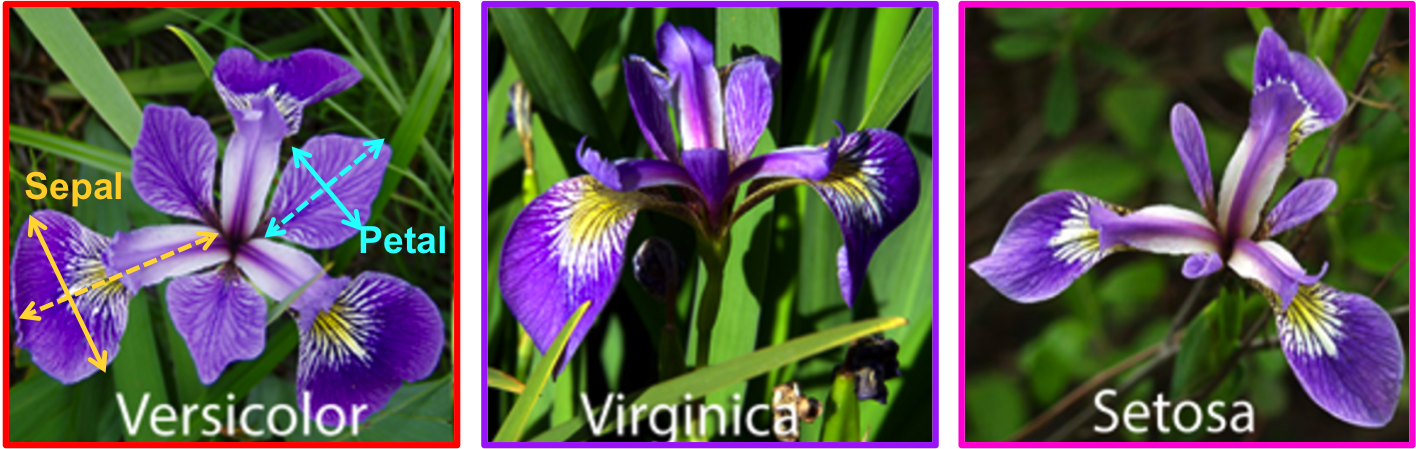

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features.

In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import data
iris = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/IRIS.csv')

In [ ]:
# view data
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# info of data
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# summary statistics
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# check for missing value
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
# check for categories
iris.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

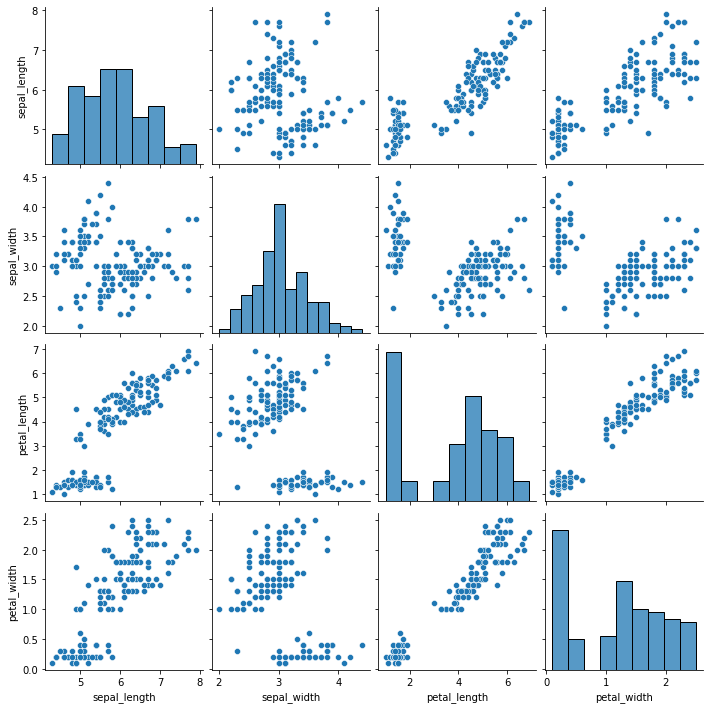

In [ ]:
# visualize pairplot
sns.pairplot(iris)

In [ ]:
# column names
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
# define y
y = iris['species']

In [ ]:
# define X
X = iris[['sepal_length', 'sepal_width',
          'petal_length', 'petal_width']]

In [ ]:
# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.30, random_state=2529)

In [ ]:
# verify shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [ ]:
# select model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [ ]:
# train model
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# predict with model
y_pred = model.predict(X_test)

In [ ]:
# model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [ ]:
# model accuracy
accuracy_score(y_test,y_pred)

0.9333333333333333

In [ ]:
# model confusion matrix
confusion_matrix(y_test, y_pred)

array([[14,  0,  0],
       [ 0,  9,  0],
       [ 0,  3, 19]])

In [ ]:
# model classification report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.75      1.00      0.86         9
 Iris-virginica       1.00      0.86      0.93        22

       accuracy                           0.93        45
      macro avg       0.92      0.95      0.93        45
   weighted avg       0.95      0.93      0.94        45



In [ ]:
# future prediction
sample = iris.sample()
sample

,sepal_length,sepal_width,petal_length,petal_width,species
127,6.1,3.0,4.9,1.8,Iris-virginica


In [ ]:
# define X_new
X_new = sample.loc[:,X.columns]
X_new

In [ ]:
# predict for X_new
model.predict(X_new)

array(['Iris-virginica'], dtype=object)